### 전처리

In [2]:
import pandas as pd
import time

import numpy as np
import matplotlib as plt

In [3]:
drama = pd.read_csv('data/kdrama.csv', encoding = 'UTF-8')

In [4]:
drama.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [5]:
drama.head(3)

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3


In [6]:
name = pd.Series(["무브 투 헤븐", "악의 꽃", "슬기로운 의사생활", "슬기로운 의사생활 2", "나의 아저씨", "응답하라 1988", "약한 영웅 Class 1", "슬기로운 감빵생활", "환혼", "이상한 변호사 우영우", "철인왕후", "마더", "사이코지만 괜찮아", "사랑의 불시착", "빈센조", "나빌레라", "시그널", "미스터 션샤인", "해피니스", "킹덤: 시즌 2", "SKY 캐슬", "내일", "힐러", "비밀의 숲", "스물다섯 스물하나", "옷소매 붉은 끝동", "도깨비", "경이로운 소문", "마우스", "킹덤", "역도요정 김복주", "D.P.", "악마판사", "펜트하우스", "오월의 청춘", "모범택시", "라이프 온 마스", "괴물", "라켓소년단", "갯마을 차차차", "육룡이 나르샤", "그 해 우리는", "손 the guest", "디어 마이 프렌즈", "당신이 잠든 사이에", "펜트하우스 2", "시카고 타자기", "18 어게인", "아스달 연대기 파트 2"])

In [7]:
name1 = pd.Series(["아스달 연대기 파트 3", "악의 마음을 읽는 자들", "낭만닥터 김사부 2", "피고인", "우리들의 블루스", "스위트홈", "킬미, 힐미", "달의 연인", "사내맞선", "미생", "힘쎈여자 도봉순", "열혈사제", "마이 네임", "호텔 델루나", "스토브리그", "낭만닥터 김사부", "태양의 후예", "로스쿨", "타인은 지옥이다", "라이브", "터널", "나의 해방일지", "검법남녀 2", "대장금", "괜찮아, 사랑이야", "작은 아씨들", "고스트 닥터", "윌라차차 와이키키", "각시탈", "붉은 달 푸른 해", "김과장", "돼지의 왕", "빅마우스", "고백부부", "기황후", "아버지가 이상해", "한 번 다녀왔습니다", "미씽", "비밀의 숲 2", "지정생존자", "소년심판", "무정도시", "별에서 온 그대", "쌍갑포차", "청춘시대", "그냥 사랑하는 사이", "구해줘", "배드 앤 크레이지", "365: 운명을 거스르는 1년", "주군의 태양"])

In [8]:
name2 = pd.Series(["부암동 복수자들", "역적", "아무도 모른다", "나쁜 녀석들", "아름다운 세상", "아스달 연대기 파트 1", "카이로스", "너의 목소리가 들려", "김비서가 왜 그럴까", "배가본드", "어느 날", "응답하라 1997", "의사요한", "하이바이, 마마!", "보이스", "쌈 마이웨이", "오징어 게임", "더블유", "선덕여왕", "이 구역의 미친X", "달리와 감자탕", "서른이지만 열일곱입니다", "동백꽃 필 무렵", "멜로가 체질", "이태원 클라쓰", "설강화", "써클", "이번 생은 처음이라", "공주의 남자", "블라인드", "투윅스", "술꾼도시여자들", "동이", "가우스전자", "단, 하나의 사랑", "부부의 세계", "지금 우리 학교는", "인간수업", "유미의 세포들", "인간실격", "인현왕후의 남자", "천원짜리 변호사", "당신이 소원을 말하면", "로봇이 아니야", "메모리스트", "보이스 2", "어느 날 우리 집 현관으로 멸망이 들어왔다", "듀얼", "검색어를 입력하세요 WWW", "지금부터, 쇼타임!"])

In [9]:
name3 = pd.Series(["너를 기억해", "해를 품은 달", "트레인", "별똥별", "왕이 된 남자", "매드 독", "산후조리원", "나인: 아홉 번의 시간여행", "어쩌다 발견한 하루", "피노키오", "닥터 프리즈너", "너에게 가는 속도 493km", "(아는 건 별로 없지만) 가족입니다", "그녀의 사생활", "청춘시대 2", "비밀", "군검사 도베르만", "파친코", "간 떨어지는 동거", "유미의 세포들 2", "나의 나라", "대박부동산", "플레이어", "푸른 바다의 전설", "이리와 안아줘", "검법남녀", "청춘블라썸", "조선로코-녹두전", "싸이코패스 다이어리", "뷰티 인사이드", "구미호뎐", "모범형사", "사이코메트리 그녀석", "봄밤", "사운드트랙 #1", "시티헌터", "미스터 기간제", "백일의 낭군님", "멀리서 보면 푸른 봄", "거짓말의 거짓말", "안나라수마나라", "신비한 클래스", "굿 닥터", "괜찮아, 우정이야", "너와 나의 경찰수업", "여신강림", "오 나의 귀신님", "신의 선물 - 14일", "마음의 소리", "검은 태양"])

In [10]:
name4 = pd.Series(["우아한 가", "구가의 서", "사의 찬미", "주몽", "뱀파이어 검사 2", "못난이 주의보", "미스티", "보이스 3: City of Accomplices", "자백", "어게인 마이 라이프", "종이의 집: 공동경제구역 파트 1", "너도 인간이니?", "런 온", "하늘에서 내리는 일억개의 별", "번외수사", "파수꾼", "내 뒤에 테리우스", "하이에나", "진심이 닿다", "앵그리맘", "웰컴2라이프", "수상한 파트너", "마인", "날씨가 좋으면 찾아가겠어요", "무법 변호사", "크레이지 러브", "왓쳐", "아이가 다섯", "아만자", "새빛남고 학생회", "불가살", "라이어 게임", "뿌리 깊은 나무", "49일", "디데이", "낮과 밤", "오 마이 비너스", "레버리지: 사기조작단", "연모", "신사의 품격", "신입사관 구해령", "커피프린스 1호점", "유령", "연애플레이리스트 시즌 4", "신의 퀴즈: 리부트", "실종느와르 M", "명불허전", "7일의 왕비", "기억", "화유기", "보이스 4"])

In [11]:
name = pd.concat([name, name1, name2, name3, name4])

In [12]:
name.reset_index()

,index,0
0,0,무브 투 헤븐
1,1,악의 꽃
2,2,슬기로운 의사생활
3,3,슬기로운 의사생활 2
4,4,나의 아저씨
...,...,...
245,46,명불허전
246,47,7일의 왕비
247,48,기억
248,49,화유기


In [13]:
name.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       ...
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype='int64', length=250)

In [14]:
name.index = np.arange(0,250)

In [15]:
name

0          무브 투 헤븐
1             악의 꽃
2        슬기로운 의사생활
3      슬기로운 의사생활 2
4           나의 아저씨
          ...     
245           명불허전
246         7일의 왕비
247             기억
248            화유기
249          보이스 4
Length: 250, dtype: object

In [16]:
drama['Name'] = name

In [17]:
drama = drama.replace()

C:\Users\smhrd\AppData\Local\Temp\ipykernel_14776\37474544.py:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  drama = drama.replace()


In [18]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        250 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              250 non-null    object 
 13  Screenwriter          250 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

In [19]:
drama

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,무브 투 헤븐,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,악의 꽃,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,슬기로운 의사생활,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,슬기로운 의사생활 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,나의 아저씨,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,명불허전,"Aug 12, 2017 - Oct 1, 2017",2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Heo Im, who is born in a concubine family in t...","Historical, Romance, Medical, Fantasy","Time Travel, Joseon Dynasty, Acupuncture, Stro...",Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,#246
246,7일의 왕비,"May 31, 2017 - Aug 3, 2017",2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,This drama is about the love story between Kin...,"Historical, Romance, Melodrama, Political","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",#247
247,기억,"Mar 18, 2016 - May 7, 2016",2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,Park Tae Suk is a lawyer who finds out that he...,"Law, Romance, Life, Drama","Alzheimer's Disease, Teamwork, Bromance, Mothe...",Park Chan Hong,Kim Ji Woo,"Lee Sung Min, Kim Jee Soo, Park Jin Hee, Lee J...",MI Inc.,#248
248,화유기,"Dec 23, 2017 - Mar 4, 2018",2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","Horror, Comedy, Romance, Fantasy","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,#249


In [20]:
drama['Genre'][0].split(',')

['Life', '  Drama', '  Family ']

In [21]:
lst = []
for i in range(0,len(drama)) :
    lst.append(drama['Genre'][i].split(','))
    
lst

[['Life', '  Drama', '  Family '],
 ['Thriller', '  Romance', '  Crime', '  Melodrama '],
 ['Friendship', '  Romance', '  Life', '  Medical '],
 ['Friendship', '  Romance', '  Life', '  Medical '],
 ['Psychological', '  Life', '  Drama', '  Family '],
 ['Comedy', '  Romance', '  Youth', '  Family '],
 ['Action', ' Youth', ' Drama\r'],
 ['Comedy', '  Crime', '  Life', '  Drama '],
 ['Action', ' Historical', ' Romance', ' Fantasy '],
 ['Law', ' Romance', ' Life', ' Drama '],
 ['Historical', '  Mystery', '  Comedy', '  Romance '],
 ['Thriller', '  Mystery', '  Psychological', '  Melodrama '],
 ['Psychological', '  Comedy', '  Romance', '  Drama '],
 ['Military', '  Comedy', '  Romance', '  Political '],
 ['Comedy', '  Law', '  Crime', '  Drama '],
 ['Friendship', '  Life', '  Drama', '  Family '],
 ['Thriller', '  Mystery', '  Sci-Fi '],
 ['Military', '  Historical', '  Romance', '  Melodrama '],
 ['Action', '  Thriller', '  Drama', '  Fantasy '],
 ['Thriller', '  Historical', '  Horror',

In [22]:
genre = pd.Series([['Life', '  Drama', '  Family '],
 ['Thriller', '  Romance', '  Crime', '  Melodrama '],
 ['Friendship', '  Romance', '  Life', '  Medical '],
 ['Friendship', '  Romance', '  Life', '  Medical '],
 ['Psychological', '  Life', '  Drama', '  Family '],
 ['Comedy', '  Romance', '  Youth', '  Family '],
 ['Action', ' Youth', ' Drama\r'],
 ['Comedy', '  Crime', '  Life', '  Drama '],
 ['Action', ' Historical', ' Romance', ' Fantasy '],
 ['Law', ' Romance', ' Life', ' Drama '],
 ['Historical', '  Mystery', '  Comedy', '  Romance '],
 ['Thriller', '  Mystery', '  Psychological', '  Melodrama '],
 ['Psychological', '  Comedy', '  Romance', '  Drama '],
 ['Military', '  Comedy', '  Romance', '  Political '],
 ['Comedy', '  Law', '  Crime', '  Drama '],
 ['Friendship', '  Life', '  Drama', '  Family '],
 ['Thriller', '  Mystery', '  Sci-Fi '],
 ['Military', '  Historical', '  Romance', '  Melodrama '],
 ['Action', '  Thriller', '  Drama', '  Fantasy '],
 ['Thriller', '  Historical', '  Horror', '  Supernatural '],
 ['Mystery', '  Psychological', '  Drama', '  Family '],
 ['Action', ' Thriller', ' Drama', ' Fantasy '],
 ['Action', '  Thriller', '  Mystery', '  Romance '],
 ['Thriller', '  Mystery', '  Law', '  Drama '],
 ['Romance', ' Life', ' Drama', ' Melodrama '],
 ['Historical', ' Romance', ' Drama', ' Melodrama '],
 ['Comedy', '  Romance', '  Fantasy', '  Melodrama '],
 ['Action', '  Mystery', '  Drama', '  Supernatural '],
 ['Thriller', '  Mystery', '  Sci-Fi '],
 ['Thriller', '  Historical', '  Horror', '  Political '],
 ['Comedy', '  Romance', '  Youth', '  Sports '],
 ['Action', '  Military', '  Comedy', '  Drama '],
 ['Mystery', '  Law', '  Crime', '  Drama '],
 ['Thriller', '  Mystery', '  Drama', '  Family '],
 ['Historical', '  Romance', '  Drama', '  Melodrama '],
 ['Action', '  Thriller', '  Mystery', '  Drama '],
 ['Action', '  Mystery', '  Comedy', '  Supernatural '],
 ['Thriller', '  Mystery', '  Psychological', '  Drama '],
 ['Friendship', '  Comedy', '  Youth', '  Sports '],
 ['Comedy', '  Romance', '  Life '],
 ['Action', '  Historical', '  Drama', '  Political '],
 ['Romance', ' Life', ' Youth', ' Drama '],
 ['Thriller', '  Mystery', '  Horror', '  Supernatural '],
 ['Life', '  Drama', '  Family', '  Melodrama '],
 ['Mystery', '  Romance', '  Drama', '  Fantasy '],
 ['Thriller', '  Mystery', '  Drama', '  Family '],
 ['Comedy', '  Romance', '  Supernatural', '  Political '],
 ['Romance', '  Life', '  Drama', '  Fantasy '],
 ['Historical', '  Romance', '  Fantasy', '  Political '],
 ['Historical', '  Romance', '  Fantasy', '  Political '],
 ['Thriller', ' Mystery', ' Crime', ' Drama '],
 ['Romance', '  Drama', '  Medical', '  Melodrama '],
 ['Thriller', '  Mystery', '  Law', '  Drama '],
 ['Romance', ' Life', ' Drama', ' Melodrama'],
 ['Horror', '  Drama', '  Sci-Fi', '  Supernatural '],
 ['Psychological', '  Comedy', '  Romance', '  Drama '],
 ['Historical', '  Romance', '  Melodrama '],
 ['Comedy', ' Romance', ' Drama'],
 ['Friendship', '  Business', '  Life', '  Drama '],
 ['Action',
  '  Thriller',
  '  Comedy',
  '  Romance',
  '  Drama',
  '  Supernatural '],
 ['Action', '  Mystery', '  Comedy', '  Crime '],
 ['Action', '  Thriller', '  Crime '],
 ['Horror', '  Comedy', '  Romance', '  Fantasy '],
 ['Drama', '  Sports', '  Melodrama '],
 ['Romance', '  Drama', '  Medical '],
 ['Action', '  Comedy', '  Romance', '  Melodrama '],
 ['Mystery', '  Law', '  Crime', '  Drama '],
 ['Thriller', '  Horror', '  Psychological', '  Drama '],
 ['Friendship', '  Comedy', '  Romance', '  Crime '],
 ['Thriller', '  Mystery', '  Sci-Fi', '  Fantasy '],
 ['Romance', ' Life', ' Drama', ' Melodrama'],
 ['Mystery', '  Law', '  Drama', '  Medical '],
 ['Food', '  Historical', '  Romance', '  Medical '],
 ['Psychological', '  Comedy', '  Romance', '  Drama '],
 ['Action', ' Thriller', ' Mystery', ' Drama'],
 ['Comedy', ' Medical', ' Fantasy', ' Supernatural'],
 ['Comedy', '  Life', '  Youth', '  Drama '],
 ['Action', '  Historical', '  Romance', '  Political '],
 ['Thriller', '  Mystery', '  Psychological', '  Crime', '  Drama '],
 ['Business', '  Comedy', '  Crime', '  Drama '],
 ['Thriller', ' Mystery', ' Drama'],
 ['Thriller', ' Mystery', ' Law', ' Drama'],
 ['Comedy',
  '  Romance',
  '  Life',
  '  School',
  '  Drama',
  '  Family',
  '  Supernatural '],
 ['Historical', '  Romance', '  Melodrama', '  Political '],
 ['Comedy', '  Romance', '  Drama', '  Family '],
 ['Comedy', '  Romance', '  Drama', '  Family '],
 ['Thriller', '  Mystery', '  Supernatural '],
 ['Thriller', '  Mystery', '  Law', '  Drama '],
 ['Thriller', '  Mystery', '  Drama', '  Political '],
 ['Law', ' Drama'],
 ['Action', '  Thriller', '  Romance', '  Crime '],
 ['Comedy', '  Romance', '  Drama', '  Supernatural '],
 ['Mystery', '  Comedy', '  Family', '  Fantasy '],
 ['Friendship', '  Romance', '  Life', '  Youth '],
 ['Psychological', '  Romance', '  Melodrama '],
 ['Action', '  Thriller', '  Mystery', '  Drama '],
 ['Action', ' Thriller', ' Mystery', ' Comedy'],
 ['Thriller', '  Mystery', '  Drama', '  Fantasy '],
 ['Horror', '  Comedy', '  Romance', '  Supernatural '],
 ['Friendship', '  Comedy', '  Life', '  Drama '],
 ['Action', '  Thriller', '  Historical', '  Romance '],
 ['Thriller', '  Mystery', '  Drama', '  Melodrama '],
 ['Action', '  Thriller', '  Psychological', '  Crime '],
 ['Life', '  School', '  Family', '  Melodrama '],
 ['Historical', '  Romance', '  Fantasy', '  Political '],
 ['Action', '  Thriller', '  Drama', '  Sci-Fi '],
 ['Mystery', '  Law', '  Romance', '  Supernatural '],
 ['Friendship', '  Business', '  Comedy', '  Romance '],
 ['Action', '  Thriller', '  Mystery', '  Crime '],
 ['Thriller', ' Mystery', ' Law', ' Crime'],
 ['Comedy', '  Romance', '  Life', '  Family '],
 ['Mystery', '  Romance', '  Life', '  Medical '],
 ['Romance', ' Drama', ' Melodrama', ' Supernatural'],
 ['Thriller', ' Mystery', ' Psychological'],
 ['Business', '  Comedy', '  Romance', '  Sports '],
 ['Action', '  Thriller', '  Mystery', '  Drama '],
 ['Thriller', ' Comedy', ' Romance', ' Fantasy'],
 ['Historical', ' Romance', ' Drama', ' Political'],
 ['Comedy', ' Romance', ' Drama'],
 ['Comedy', '  Romance', '  Drama '],
 ['Music', ' Mystery', ' Comedy', ' Romance'],
 ['Thriller', '  Comedy', '  Romance', '  Drama', '  Family '],
 ['Comedy', ' Romance', ' Life', ' Melodrama'],
 ['Business', ' Romance', ' Life', ' Drama'],
 ['Romance', ' Drama', ' Melodrama', ' Political'],
 ['Thriller', ' Mystery', ' Sci-Fi'],
 ['Comedy', '  Romance', '  Life', '  Drama '],
 ['Action', ' Historical', ' Romance', ' Political'],
 ['Thriller', ' Mystery', ' Drama'],
 ['Action', ' Thriller', ' Mystery', ' Drama'],
 ['Comedy', ' Life', ' Drama'],
 ['Adventure', ' Historical', ' Mystery', ' Romance'],
 ['Business', ' Comedy', ' Romance', ' Life'],
 ['Comedy', ' Romance', ' Drama', ' Fantasy'],
 ['Thriller', ' Romance', ' Drama', ' Melodrama'],
 ['Action', ' Thriller', ' Horror', ' Sci-Fi'],
 ['Psychological', ' Crime', ' Youth', ' Drama'],
 ['Psychological', '  Comedy', '  Romance', '  Drama '],
 ['Life', ' Drama', ' Melodrama'],
 ['Historical', ' Comedy', ' Romance', ' Fantasy'],
 ['Comedy', ' Law', ' Drama'],
 ['Romance', ' Life', ' Drama', ' Medical'],
 ['Comedy', ' Romance', ' Drama', ' Sci-Fi'],
 ['Action', ' Thriller', ' Mystery', ' Supernatural'],
 ['Thriller', ' Mystery', ' Psychological'],
 ['Comedy', ' Romance', ' Drama', ' Fantasy'],
 ['Thriller', ' Mystery', ' Sci-Fi'],
 ['Business', ' Comedy', ' Romance', ' Drama'],
 ['Mystery', ' Comedy', ' Romance', ' Fantasy'],
 ['Thriller', ' Mystery', ' Psychological', ' Drama'],
 ['Historical', ' Romance', ' Supernatural', ' Political'],
 ['Thriller', ' Mystery', ' Sci-Fi'],
 ['Comedy', ' Romance', ' Drama'],
 ['Historical', ' Romance', ' Melodrama', ' Political'],
 ['Action', ' Thriller', ' Mystery'],
 ['Comedy', ' Life', ' Drama', ' Melodrama'],
 ['Mystery', ' Romance', ' Supernatural'],
 ['Comedy', ' Romance', ' Youth', ' Fantasy'],
 ['Thriller', ' Mystery', ' Comedy', ' Romance'],
 ['Thriller', ' Law', ' Crime', ' Medical'],
 ['Romance', ' Drama', ' Sports', ' Melodrama'],
 ['Life', ' Drama'],
 ['Business', ' Comedy', ' Romance', ' Drama'],
 ['Mystery', ' Comedy', ' Romance', ' Life'],
 ['Romance', ' Drama', ' Melodrama'],
 ['Action', ' Military', ' Mystery', ' Law'],
 ['Historical', ' Romance', ' Drama', ' Melodrama'],
 ['Comedy', ' Romance', ' Fantasy'],
 ['Comedy', ' Romance', ' Life'],
 ['Action', ' Historical', ' Romance', ' Drama'],
 ['Thriller', ' Mystery', ' Comedy', ' Fantasy'],
 ['Action', ' Thriller', ' Mystery', ' Comedy'],
 ['Comedy', ' Romance', ' Drama', ' Fantasy'],
 ['Thriller', ' Mystery', ' Romance', ' Melodrama'],
 ['Thriller', ' Mystery', ' Law', ' Medical'],
 ['Comedy', ' Romance', ' Youth', ' Drama'],
 ['Action', ' Historical', ' Comedy', ' Romance'],
 ['Thriller', ' Mystery', ' Comedy', ' Crime'],
 ['Comedy', ' Romance', ' Melodrama', ' Supernatural'],
 ['Thriller', ' Horror', ' Romance', ' Fantasy'],
 ['Action', ' Thriller', ' Mystery', ' Drama'],
 ['Thriller', ' Mystery', ' Romance', ' Supernatural'],
 ['Romance', ' Life', ' Drama', ' Melodrama'],
 ['Music', ' Romance'],
 ['Action', ' Thriller', ' Crime'],
 ['Thriller', ' Mystery', ' Law', ' Youth'],
 ['Historical', ' Comedy', ' Romance', ' Drama'],
 ['Romance', ' Life', ' Youth'],
 ['Thriller', ' Romance', ' Melodrama'],
 ['Music', ' Psychological', ' Drama', ' Fantasy'],
 ['Mystery', ' Horror', ' Youth', ' Supernatural'],
 ['Romance', ' Life', ' Drama', ' Medical'],
 ['Comedy', ' Life'],
 ['Romance', ' Life', ' Youth', ' Drama '],
 ['Comedy', ' Romance', ' Youth', ' Drama'],
 ['Thriller', ' Comedy', ' Romance', ' Supernatural'],
 ['Thriller', ' Mystery', ' Drama', ' Supernatural'],
 ['Comedy', ' Life', ' Sitcom'],
 ['Action', ' Thriller', ' Mystery', ' Crime'],
 ['Thriller', ' Mystery', ' Drama', ' Melodrama'],
 ['Action', ' Historical', ' Romance', ' Fantasy '],
 ['Music', ' Historical', ' Romance', ' Melodrama'],
 ['Adventure', ' Historical', ' Romance', ' Drama'],
 ['Action', ' Mystery', ' Drama', ' Supernatural'],
 ['Business', ' Romance', ' Melodrama'],
 ['Thriller', ' Mystery', ' Romance', ' Melodrama'],
 ['Thriller', ' Mystery', ' Psychological', ' Crime'],
 ['Thriller', ' Mystery', ' Law', ' Drama'],
 ['Mystery', ' Law', ' Drama', ' Fantasy'],
 ['Action', ' Thriller', ' Mystery', ' Crime'],
 ['Comedy', ' Romance', ' Sci-Fi', ' Fantasy'],
 ['Romance', ' Life', ' Drama', ' Sports'],
 ['Thriller', ' Mystery', ' Romance', ' Drama'],
 ['Action', ' Mystery', ' Comedy', ' Drama'],
 ['Action', ' Thriller', ' Mystery', ' Law', ' Crime'],
 ['Action', ' Mystery', ' Comedy', ' Romance'],
 ['Mystery', ' Comedy', ' Law', ' Romance'],
 ['Comedy', ' Law', ' Romance', ' Drama'],
 ['Comedy', ' Drama', ' Melodrama'],
 ['Comedy', ' Law', ' Romance', ' Fantasy'],
 ['Thriller', ' Comedy', ' Law', ' Romance'],
 ['Thriller', ' Mystery', ' Drama'],
 ['Romance', ' Life', ' Drama', ' Melodrama'],
 ['Action', ' Thriller', ' Law', ' Romance'],
 ['Comedy', ' Romance', ' Drama'],
 ['Thriller', ' Mystery', ' Drama', ' Political'],
 ['Comedy', ' Romance', ' Drama', ' Melodrama'],
 ['Adventure', ' Life', ' Fantasy', ' Melodrama'],
 ['Romance', ' Youth', ' Drama'],
 ['Thriller', ' Mystery', ' Drama', ' Fantasy'],
 ['Thriller', ' Mystery', ' Psychological', ' Drama'],
 ['Historical', ' Mystery', ' Political'],
 ['Romance', ' Drama', ' Melodrama', ' Supernatural'],
 ['Romance', ' Drama', ' Medical'],
 ['Thriller', ' Mystery', ' Crime', ' Fantasy'],
 ['Comedy', ' Law', ' Romance', ' Life'],
 ['Action', ' Mystery', ' Comedy', ' Crime'],
 ['Historical', ' Romance', ' Drama'],
 ['Comedy', ' Romance', ' Drama', ' Melodrama'],
 ['Historical', ' Comedy', ' Romance', ' Drama'],
 ['Food', ' Comedy', ' Romance', ' Drama'],
 ['Thriller', ' Mystery'],
 ['Romance', ' Life', ' Youth', ' Drama'],
 ['Mystery', ' Medical'],
 ['Thriller', ' Mystery', ' Drama'],
 ['Historical', ' Romance', ' Medical', ' Fantasy'],
 ['Historical', ' Romance', ' Melodrama', ' Political'],
 ['Law', ' Romance', ' Life', ' Drama'],
 ['Horror', ' Comedy', ' Romance', ' Fantasy'],
 ['Action', ' Thriller', ' Mystery', ' Crime']])

In [23]:
drama['Genre'] = genre

In [24]:
drama

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,무브 투 헤븐,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"[Life, Drama, Family ]","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,악의 꽃,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"[Thriller, Romance, Crime, Melodrama ]","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,슬기로운 의사생활,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"[Friendship, Romance, Life, Medical ]","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,슬기로운 의사생활 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"[Friendship, Romance, Life, Medical ]","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,나의 아저씨,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"[Psychological, Life, Drama, Family ]","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,명불허전,"Aug 12, 2017 - Oct 1, 2017",2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Heo Im, who is born in a concubine family in t...","[Historical, Romance, Medical, Fantasy]","Time Travel, Joseon Dynasty, Acupuncture, Stro...",Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,#246
246,7일의 왕비,"May 31, 2017 - Aug 3, 2017",2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,This drama is about the love story between Kin...,"[Historical, Romance, Melodrama, Political]","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",#247
247,기억,"Mar 18, 2016 - May 7, 2016",2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,Park Tae Suk is a lawyer who finds out that he...,"[Law, Romance, Life, Drama]","Alzheimer's Disease, Teamwork, Bromance, Mothe...",Park Chan Hong,Kim Ji Woo,"Lee Sung Min, Kim Jee Soo, Park Jin Hee, Lee J...",MI Inc.,#248
248,화유기,"Dec 23, 2017 - Mar 4, 2018",2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","[Horror, Comedy, Romance, Fantasy]","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,#249


In [25]:
drama[['Name','Genre']].groupby('Name').count()

,Genre
Name,
(아는 건 별로 없지만) 가족입니다,1
18 어게인,1
365: 운명을 거스르는 1년,1
49일,1
7일의 왕비,1
...,...
호텔 델루나,1
화유기,1
환혼,1


In [26]:
for i in range(len(drama)):
    print(drama['Name'][i])
    for j in drama['Genre'][i]:
        print(j)

무브 투 헤븐
Life
  Drama
  Family 
악의 꽃
Thriller
  Romance
  Crime
  Melodrama 
슬기로운 의사생활
Friendship
  Romance
  Life
  Medical 
슬기로운 의사생활 2
Friendship
  Romance
  Life
  Medical 
나의 아저씨
Psychological
  Life
  Drama
  Family 
응답하라 1988
Comedy
  Romance
  Youth
  Family 
약한 영웅 Class 1
Action
 Youth
 Drama
슬기로운 감빵생활
Comedy
  Crime
  Life
  Drama 
환혼
Action
 Historical
 Romance
 Fantasy 
이상한 변호사 우영우
Law
 Romance
 Life
 Drama 
철인왕후
Historical
  Mystery
  Comedy
  Romance 
마더
Thriller
  Mystery
  Psychological
  Melodrama 
사이코지만 괜찮아
Psychological
  Comedy
  Romance
  Drama 
사랑의 불시착
Military
  Comedy
  Romance
  Political 
빈센조
Comedy
  Law
  Crime
  Drama 
나빌레라
Friendship
  Life
  Drama
  Family 
시그널
Thriller
  Mystery
  Sci-Fi 
미스터 션샤인
Military
  Historical
  Romance
  Melodrama 
해피니스
Action
  Thriller
  Drama
  Fantasy 
킹덤: 시즌 2
Thriller
  Historical
  Horror
  Supernatural 
SKY 캐슬
Mystery
  Psychological
  Drama
  Family 
내일
Action
 Thriller
 Drama
 Fantasy 
힐러
Action
  Thriller
  Mystery
  R

In [27]:
Genre_lst = []
for i in range(len(drama)):
    for j in drama['Genre'][i]:
        Genre_lst.append(j)
Genre_lst

['Life',
 '  Drama',
 '  Family ',
 'Thriller',
 '  Romance',
 '  Crime',
 '  Melodrama ',
 'Friendship',
 '  Romance',
 '  Life',
 '  Medical ',
 'Friendship',
 '  Romance',
 '  Life',
 '  Medical ',
 'Psychological',
 '  Life',
 '  Drama',
 '  Family ',
 'Comedy',
 '  Romance',
 '  Youth',
 '  Family ',
 'Action',
 ' Youth',
 ' Drama\r',
 'Comedy',
 '  Crime',
 '  Life',
 '  Drama ',
 'Action',
 ' Historical',
 ' Romance',
 ' Fantasy ',
 'Law',
 ' Romance',
 ' Life',
 ' Drama ',
 'Historical',
 '  Mystery',
 '  Comedy',
 '  Romance ',
 'Thriller',
 '  Mystery',
 '  Psychological',
 '  Melodrama ',
 'Psychological',
 '  Comedy',
 '  Romance',
 '  Drama ',
 'Military',
 '  Comedy',
 '  Romance',
 '  Political ',
 'Comedy',
 '  Law',
 '  Crime',
 '  Drama ',
 'Friendship',
 '  Life',
 '  Drama',
 '  Family ',
 'Thriller',
 '  Mystery',
 '  Sci-Fi ',
 'Military',
 '  Historical',
 '  Romance',
 '  Melodrama ',
 'Action',
 '  Thriller',
 '  Drama',
 '  Fantasy ',
 'Thriller',
 '  Historic

In [28]:
clear = []
for i in range(0,len(Genre_lst)) :
    clear.append(Genre_lst[i].strip().lower())
clear

['life',
 'drama',
 'family',
 'thriller',
 'romance',
 'crime',
 'melodrama',
 'friendship',
 'romance',
 'life',
 'medical',
 'friendship',
 'romance',
 'life',
 'medical',
 'psychological',
 'life',
 'drama',
 'family',
 'comedy',
 'romance',
 'youth',
 'family',
 'action',
 'youth',
 'drama',
 'comedy',
 'crime',
 'life',
 'drama',
 'action',
 'historical',
 'romance',
 'fantasy',
 'law',
 'romance',
 'life',
 'drama',
 'historical',
 'mystery',
 'comedy',
 'romance',
 'thriller',
 'mystery',
 'psychological',
 'melodrama',
 'psychological',
 'comedy',
 'romance',
 'drama',
 'military',
 'comedy',
 'romance',
 'political',
 'comedy',
 'law',
 'crime',
 'drama',
 'friendship',
 'life',
 'drama',
 'family',
 'thriller',
 'mystery',
 'sci-fi',
 'military',
 'historical',
 'romance',
 'melodrama',
 'action',
 'thriller',
 'drama',
 'fantasy',
 'thriller',
 'historical',
 'horror',
 'supernatural',
 'mystery',
 'psychological',
 'drama',
 'family',
 'action',
 'thriller',
 'drama',
 'fa

In [29]:
clear_pd = pd.DataFrame(clear, columns =['genre'])

In [30]:
count_genre = clear_pd['genre'].value_counts()
count_genre

genre
romance          136
drama            129
mystery           90
comedy            88
thriller          86
life              45
action            45
melodrama         43
historical        34
fantasy           34
law               27
crime             26
supernatural      24
psychological     19
political         18
youth             17
medical           15
family            15
horror            11
sci-fi            11
friendship         9
business           9
sports             6
military           4
music              4
adventure          3
food               2
school             2
sitcom             1
Name: count, dtype: int64

In [31]:
for i in range(len(drama)):
    drama['Genre'][i]
    for j in drama['Genre'][i]:
        print(j)

Life
  Drama
  Family 
Thriller
  Romance
  Crime
  Melodrama 
Friendship
  Romance
  Life
  Medical 
Friendship
  Romance
  Life
  Medical 
Psychological
  Life
  Drama
  Family 
Comedy
  Romance
  Youth
  Family 
Action
 Youth
 Drama
Comedy
  Crime
  Life
  Drama 
Action
 Historical
 Romance
 Fantasy 
Law
 Romance
 Life
 Drama 
Historical
  Mystery
  Comedy
  Romance 
Thriller
  Mystery
  Psychological
  Melodrama 
Psychological
  Comedy
  Romance
  Drama 
Military
  Comedy
  Romance
  Political 
Comedy
  Law
  Crime
  Drama 
Friendship
  Life
  Drama
  Family 
Thriller
  Mystery
  Sci-Fi 
Military
  Historical
  Romance
  Melodrama 
Action
  Thriller
  Drama
  Fantasy 
Thriller
  Historical
  Horror
  Supernatural 
Mystery
  Psychological
  Drama
  Family 
Action
 Thriller
 Drama
 Fantasy 
Action
  Thriller
  Mystery
  Romance 
Thriller
  Mystery
  Law
  Drama 
Romance
 Life
 Drama
 Melodrama 
Historical
 Romance
 Drama
 Melodrama 
Comedy
  Romance
  Fantasy
  Melodrama 
Action
  My

In [32]:
le=[]
for i in drama['Genre'] :
    l =[]
    for j in i :
        # drama['Genre'] = drama['Genre'][j].strip()
        l.append(j.strip())
    le.append(l)
print(le)

[['Life', 'Drama', 'Family'], ['Thriller', 'Romance', 'Crime', 'Melodrama'], ['Friendship', 'Romance', 'Life', 'Medical'], ['Friendship', 'Romance', 'Life', 'Medical'], ['Psychological', 'Life', 'Drama', 'Family'], ['Comedy', 'Romance', 'Youth', 'Family'], ['Action', 'Youth', 'Drama'], ['Comedy', 'Crime', 'Life', 'Drama'], ['Action', 'Historical', 'Romance', 'Fantasy'], ['Law', 'Romance', 'Life', 'Drama'], ['Historical', 'Mystery', 'Comedy', 'Romance'], ['Thriller', 'Mystery', 'Psychological', 'Melodrama'], ['Psychological', 'Comedy', 'Romance', 'Drama'], ['Military', 'Comedy', 'Romance', 'Political'], ['Comedy', 'Law', 'Crime', 'Drama'], ['Friendship', 'Life', 'Drama', 'Family'], ['Thriller', 'Mystery', 'Sci-Fi'], ['Military', 'Historical', 'Romance', 'Melodrama'], ['Action', 'Thriller', 'Drama', 'Fantasy'], ['Thriller', 'Historical', 'Horror', 'Supernatural'], ['Mystery', 'Psychological', 'Drama', 'Family'], ['Action', 'Thriller', 'Drama', 'Fantasy'], ['Action', 'Thriller', 'Mystery'

In [33]:
le[0]

['Life', 'Drama', 'Family']

In [34]:
for i in range(len(drama['Genre'])):
    drama.at[i,'Genre']=le[i]

In [35]:
drama['Genre'][2]

['Friendship', 'Romance', 'Life', 'Medical']

In [36]:
for i in range(len(drama['Genre'])):
    drama.at[i,'Genre']=le[i]

In [37]:
drama_test = drama

In [38]:
drama

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,무브 투 헤븐,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"[Life, Drama, Family]","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,악의 꽃,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"[Thriller, Romance, Crime, Melodrama]","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,슬기로운 의사생활,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"[Friendship, Romance, Life, Medical]","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,슬기로운 의사생활 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"[Friendship, Romance, Life, Medical]","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,나의 아저씨,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"[Psychological, Life, Drama, Family]","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,명불허전,"Aug 12, 2017 - Oct 1, 2017",2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Heo Im, who is born in a concubine family in t...","[Historical, Romance, Medical, Fantasy]","Time Travel, Joseon Dynasty, Acupuncture, Stro...",Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,#246
246,7일의 왕비,"May 31, 2017 - Aug 3, 2017",2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,This drama is about the love story between Kin...,"[Historical, Romance, Melodrama, Political]","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",#247
247,기억,"Mar 18, 2016 - May 7, 2016",2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,Park Tae Suk is a lawyer who finds out that he...,"[Law, Romance, Life, Drama]","Alzheimer's Disease, Teamwork, Bromance, Mothe...",Park Chan Hong,Kim Ji Woo,"Lee Sung Min, Kim Jee Soo, Park Jin Hee, Lee J...",MI Inc.,#248
248,화유기,"Dec 23, 2017 - Mar 4, 2018",2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","[Horror, Comedy, Romance, Fantasy]","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,#249


In [39]:
lest=[]
for i in range(len(drama['Genre'] )):
    lst = []
    for j in drama['Genre'][i]:
        if j == 'Life' :
            j = '인생'
        elif j == 'Drama' :
            j = '드라마'
        elif j == 'Mystery' :
            j = '미스터리'
        elif j == 'Romance' :
            j = '로맨스'
        elif j == 'Comedy' :
            j = '코미디'
        elif j == 'Thriller' :
            j = '스릴러'
        elif j == 'Action' :
            j = '액션'
        elif j == 'Melodrama' :
            j = '멜로드라마'
        elif j == 'Historical' :
            j = '역사'
        elif j == 'Fantasy' :
            j = '판타지'
        elif j == 'Law' :
            j = '법률'
        elif j == 'Crime' :
            j = '범죄'
        elif j == 'Supernatural' :
            j = '초자연'
        elif j == 'Psychological' :
            j = '심리'
        elif j == 'Political' :
            j = '정치'
        elif j == 'Youth' :
            j = '청춘'
        elif j == 'Medical' :
            j = '의료'
        elif j == 'Family' :
            j = '가족'
        elif j == 'Horror' :
            j = '공포'
        elif j == 'Sci-Fi' :
            j = 'SF'
        elif j == 'Friendship' :
            j = '우정'
        elif j == 'Business' :
            j = '비즈니스'
        elif j == 'Sports' :
            j = '스포츠'
        elif j == 'Military' :
            j = '군대'
        elif j == 'Music' :
            j = '음악'
        elif j == 'Adventure' :
            j = '모험'
        elif j == 'Food' :
            j = '음식'
        elif j == 'School' :
            j = '학교'
        elif j == 'Sitcom' :
            j = '시트콤'
        lst.append(j)
    drama.at[i,'Genre']=lst
    


In [40]:
drama

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,무브 투 헤븐,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"[인생, 드라마, 가족]","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,악의 꽃,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"[스릴러, 로맨스, 범죄, 멜로드라마]","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,슬기로운 의사생활,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"[우정, 로맨스, 인생, 의료]","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,슬기로운 의사생활 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"[우정, 로맨스, 인생, 의료]","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,나의 아저씨,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"[심리, 인생, 드라마, 가족]","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,명불허전,"Aug 12, 2017 - Oct 1, 2017",2017,tvN,"Saturday, Sunday",16,1 hr. 10 min.,15+ - Teens 15 or older,8.3,"Heo Im, who is born in a concubine family in t...","[역사, 로맨스, 의료, 판타지]","Time Travel, Joseon Dynasty, Acupuncture, Stro...",Hong Jong Chan,Kim Eun Hee,"Kim Nam Gil, Kim Ah Joong, Yoo Min Kyu, Moon G...",Bon Factory Worldwide,#246
246,7일의 왕비,"May 31, 2017 - Aug 3, 2017",2017,KBS2,"Wednesday, Thursday",20,60 min.,15+ - Teens 15 or older,8.3,This drama is about the love story between Kin...,"[역사, 로맨스, 멜로드라마, 정치]","Joseon Dynasty, Sibling Rivalry, Lying, Reveng...",Lee Jung Sub,Choi Jin Young,"Park Min Young, Yeon Woo Jin, Lee Dong Gun, Ja...","Monster Union, OH!BROTHERS Production",#247
247,기억,"Mar 18, 2016 - May 7, 2016",2016,tvN,"Friday, Saturday",16,1 hr. 5 min.,15+ - Teens 15 or older,8.3,Park Tae Suk is a lawyer who finds out that he...,"[법률, 로맨스, 인생, 드라마]","Alzheimer's Disease, Teamwork, Bromance, Mothe...",Park Chan Hong,Kim Ji Woo,"Lee Sung Min, Kim Jee Soo, Park Jin Hee, Lee J...",MI Inc.,#248
248,화유기,"Dec 23, 2017 - Mar 4, 2018",2017,"Netflix, tvN","Saturday, Sunday",20,1 hr. 20 min.,15+ - Teens 15 or older,8.3,"In 2017, Son Oh Gong and Ma Wang are in confli...","[공포, 코미디, 로맨스, 판타지]","Ghost-seeing Female Lead, Special Power, Super...","Park Hong Kyun, Kim Jung Hyun, Kim Byung Soo","Hong Jung Eun, Hong Mi Ran","Lee Seung Gi, Cha Seung Won, Oh Yeon Seo, Lee ...",JS Pictures,#249


In [41]:
drama_yj = pd.read_csv('data/drama_plus.csv',encoding = 'UTF-8')

In [42]:
drama_yj

,Unnamed: 0,제목,장르,출시년도
0,0,돌풍,드라마,2024년
1,1,약한영웅 Class 1,"드라마, 액션, 범죄, 스릴러",2022년
2,2,카지노 시즌 1,"드라마, 범죄, 스릴러, 액션",2022년
3,3,반짝이는 워터멜론,"드라마, 판타지, 로맨스, 코미디, 음악",2023년
4,4,신병 시즌 2,"드라마, 코미디",2023년
...,...,...,...,...
173,173,사랑한다고 말해줘,"드라마, 로맨스",2023년
174,174,한여름의 추억,드라마,2017년
175,175,서른이지만 열일곱입니다,드라마,2018년
176,176,간 떨어지는 동거,"드라마, 로맨스",2021년


In [43]:
drama['Name']

0          무브 투 헤븐
1             악의 꽃
2        슬기로운 의사생활
3      슬기로운 의사생활 2
4           나의 아저씨
          ...     
245           명불허전
246         7일의 왕비
247             기억
248            화유기
249          보이스 4
Name: Name, Length: 250, dtype: object

In [49]:
for i in range(len(drama_yj['Genre'])):
    drama_yj['Genre'][i] = drama_yj['Genre'][i].split(',')

In [44]:
select_columns = ['Name','Year of release','Genre']

In [45]:
data = drama[select_columns]

In [47]:
drama_yj.drop('Unnamed: 0',axis = 1, inplace = True)

In [48]:
drama_yj.columns = ['Name','Genre','Year of release']

In [51]:
data_a = pd.concat([data,drama_yj])
data_a

,Name,Year of release,Genre
0,무브 투 헤븐,2021,"[인생, 드라마, 가족]"
1,악의 꽃,2020,"[스릴러, 로맨스, 범죄, 멜로드라마]"
2,슬기로운 의사생활,2020,"[우정, 로맨스, 인생, 의료]"
3,슬기로운 의사생활 2,2021,"[우정, 로맨스, 인생, 의료]"
4,나의 아저씨,2018,"[심리, 인생, 드라마, 가족]"
...,...,...,...
173,사랑한다고 말해줘,2023년,"[드라마, 로맨스]"
174,한여름의 추억,2017년,[드라마]
175,서른이지만 열일곱입니다,2018년,[드라마]
176,간 떨어지는 동거,2021년,"[드라마, 로맨스]"


In [52]:
data_ty1 = pd.read_csv('data/data1.csv', encoding = 'cp949')
data_ty1

,Name,Genre,Year od release
0,혼례대첩,"로맨스, 코미디, 판타지, 역사, 정치",2015
1,진짜가 나타났다,"로맨스, 코미디, 가족",2015
2,"어쩌다 마추친, 그대","판타지, 추리, 미스터리, 스릴러, 서스펜스, 누아르, 가족, 휴먼, 로맨스, 드라마",2015
3,오아시스,"역사, 로맨스",2015
4,가슴이 뚼다,"판타지, 로맨스, 코미디",2015
...,...,...,...
81,프로듀사,드라마,2023
82,오렌지 마말레이드,"판타지, 로맨스",2023
83,파랑새의 집,드라마,2023
84,가족을 지켜라,드라마,2024


In [53]:
data_ty2 = pd.read_csv('data/data2.csv', encoding = 'euc-kr')
data_ty2

,Name,Genre,Year od release
0,우리집,"드라마, 블랙 코미디, 휴먼, 스릴러, 가족, 미스터리",2024
1,수사반장 1958,"시대극, 범죄, 코미디, 액션, 정의구현물, 스릴러, 형사, 휴먼, 청춘, 추리",2024
2,세번째 결혼,"범죄, 복수, 로맨스, 코미디",2023
3,원더풀 월드,"복수, 미스터리, 막장, 로맨스, 느와르, 서스펜스, 범죄, 휴먼, 스릴러, 피카레...",2024
4,밤에 피는 꽃,"역사, 코미디, 액션, 수사",2024
...,...,...,...
64,"킬미,힐미","로맨스, 로맨틱 코미디, 드라마",2015
65,여자를 울려,"가족, 막장, 드라마",2015
66,화정,사극,2015
67,이브의 사랑,"막장, 드라마",2015


In [ ]:
for i in range(len(data_ty1['Genre'])):
    data_ty1['Genre'][i] = data_ty1['Genre'][i].split(',')
for i in range(len(data_ty2['Genre'])):
    data_ty2['Genre'][i] = data_ty2['Genre'][i].split(',')

In [55]:
data_ty1.columns = ['Name','Genre','Year of release']
data_ty2.columns = ['Name','Genre','Year of release']

In [56]:
data = pd.concat([data_a, data_ty1,data_ty2])
data.index = np.arange(0,583)
data['Name'].count()

583

In [57]:
data = data.loc[data['Name'].duplicated()!=True,:]
data.index = np.arange(0,501)
data

,Name,Year of release,Genre
0,무브 투 헤븐,2021,"[인생, 드라마, 가족]"
1,악의 꽃,2020,"[스릴러, 로맨스, 범죄, 멜로드라마]"
2,슬기로운 의사생활,2020,"[우정, 로맨스, 인생, 의료]"
3,슬기로운 의사생활 2,2021,"[우정, 로맨스, 인생, 의료]"
4,나의 아저씨,2018,"[심리, 인생, 드라마, 가족]"
...,...,...,...
496,"킬미,힐미",2015,"[로맨스, 로맨틱 코미디, 드라마]"
497,여자를 울려,2015,"[가족, 막장, 드라마]"
498,화정,2015,[사극]
499,이브의 사랑,2015,"[막장, 드라마]"


In [58]:
data.to_csv('data_sum.csv',encoding='utf-8',index=False)

### 워드클라우드

In [59]:
!pip install wordcloud

In [60]:
from wordcloud import WordCloud
from PIL import Image


In [61]:
data

,Name,Year of release,Genre
0,무브 투 헤븐,2021,"[인생, 드라마, 가족]"
1,악의 꽃,2020,"[스릴러, 로맨스, 범죄, 멜로드라마]"
2,슬기로운 의사생활,2020,"[우정, 로맨스, 인생, 의료]"
3,슬기로운 의사생활 2,2021,"[우정, 로맨스, 인생, 의료]"
4,나의 아저씨,2018,"[심리, 인생, 드라마, 가족]"
...,...,...,...
496,"킬미,힐미",2015,"[로맨스, 로맨틱 코미디, 드라마]"
497,여자를 울려,2015,"[가족, 막장, 드라마]"
498,화정,2015,[사극]
499,이브의 사랑,2015,"[막장, 드라마]"


In [62]:
print(str(data['Genre'])[:-39])

0              [인생, 드라마, 가족]
1      [스릴러, 로맨스, 범죄, 멜로드라마]
2          [우정, 로맨스, 인생, 의료]
3          [우정, 로맨스, 인생, 의료]
4          [심리, 인생, 드라마, 가족]
               ...          
496    [로맨스,  로맨틱 코미디,  드라마]
497          [가족,  막장,  드라마]
498                     [사극]
499               [막장,  드라마]
500              [로맨스,  코미디]



In [63]:
import matplotlib.pyplot as plt


In [64]:
wc = WordCloud(background_color='white', 
               font_path='C:/Windows/Fonts/malgunbd.ttf'
               ,colormap='Dark2').generate(str(data['Genre'])[:-39]*10000)

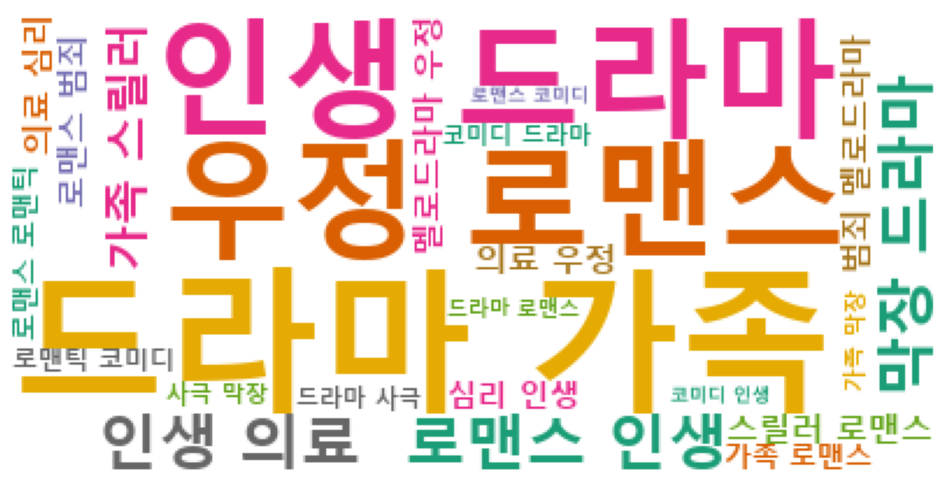

In [65]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.savefig('./static/wordcloud.jpg')

### 분석

In [66]:
data

,Name,Year of release,Genre
0,무브 투 헤븐,2021,"[인생, 드라마, 가족]"
1,악의 꽃,2020,"[스릴러, 로맨스, 범죄, 멜로드라마]"
2,슬기로운 의사생활,2020,"[우정, 로맨스, 인생, 의료]"
3,슬기로운 의사생활 2,2021,"[우정, 로맨스, 인생, 의료]"
4,나의 아저씨,2018,"[심리, 인생, 드라마, 가족]"
...,...,...,...
496,"킬미,힐미",2015,"[로맨스, 로맨틱 코미디, 드라마]"
497,여자를 울려,2015,"[가족, 막장, 드라마]"
498,화정,2015,[사극]
499,이브의 사랑,2015,"[막장, 드라마]"


In [67]:
#이상수치(같은 말인데 다르게 쓴것) 수정
for i in range(len(data['Genre'])):
        for j in range(len(data['Genre'][i])):
                data['Genre'][i][j] = data['Genre'][i][j].strip()
                if data['Genre'][i][j] =='어반 판타지':
                        data['Genre'][i][j] = '판타지'
                elif '로맨틱' in data['Genre'][i][j]:
                        if '코미디' in data['Genre'][i][j]:
                                data['Genre'][i].append('코미디')
                        data['Genre'][i][j] = '로맨스'
                elif '로맨스 코미디'== data['Genre'][i][j]:
                        data['Genre'][i][j] = '로맨스'
                        data['Genre'][i].append('코미디')
                elif '멜로'in data['Genre'][i][j]:
                        data['Genre'][i][j] = '로맨스'
                elif '어드벤처'in data['Genre'][i][j]:
                        data['Genre'][i][j] = '모험'
                elif '코미디 액션' == data['Genre'][i][j]:
                        data['Genre'][i][j] = '액션'
                        data['Genre'][i].append('코미디')
                elif '물' in  data['Genre'][i][j]:
                        data['Genre'][i][j] = data['Genre'][i][j].replace('물', '',1)
                elif '학원' == data['Genre'][i][j]:
                        data['Genre'][i][j] = '학교'
                elif '시대극' == data['Genre'][i][j]:
                        data['Genre'][i][j] = '역사'
                elif '호러' in data['Genre'][i][j]:
                        data['Genre'][i][j] = '공포'
                
data['Genre']

0             [인생, 드라마, 가족]
1       [스릴러, 로맨스, 범죄, 로맨스]
2         [우정, 로맨스, 인생, 의료]
3         [우정, 로맨스, 인생, 의료]
4         [심리, 인생, 드라마, 가족]
               ...         
496    [로맨스, 로맨스, 드라마, 코미디]
497           [가족, 막장, 드라마]
498                    [사극]
499               [막장, 드라마]
500              [로맨스, 코미디]
Name: Genre, Length: 501, dtype: object

In [68]:
# 연도 데이터가 --년인것과 str형인것을 --- int 형으로 통일 
for i in range(len(data['Year of release'])):
    if '년' in str(data['Year of release'][i]):
        data['Year of release'][i] = data['Year of release'][i].replace('년','') 
    if type(data['Year of release'][i]) == str :
        data['Year of release'][i] = int(data['Year of release'][i])

In [69]:
#장르당 갯수 카운트
def count(data):
    g_count={}
    for i in data['Genre']:
        for j in range(len(i)):
            if i[j] in g_count:
                g_count[i[j]] += 1
            else:
                g_count[i[j]] = 1
    return g_count

In [70]:
#연도를 기준으로 정렬
data = data.sort_values('Year of release')
data

,Name,Year of release,Genre
72,대장금,2003,"[음식, 역사, 로맨스, 의료]"
202,주몽,2006,"[모험, 역사, 로맨스, 드라마]"
240,커피프린스 1호점,2007,"[음식, 코미디, 로맨스, 드라마]"
117,선덕여왕,2009,"[역사, 로맨스, 드라마, 정치]"
131,동이,2010,"[모험, 역사, 미스터리, 로맨스]"
...,...,...,...
438,별난 며느리,2024,[드라마]
439,우리집,2024,"[드라마, 블랙 코미디, 휴먼, 스릴러, 가족, 미스터리]"
443,밤에 피는 꽃,2024,"[역사, 코미디, 액션, 수사]"
440,수사반장 1958,2024,"[역사, 범죄, 코미디, 액션, 정의구현, 스릴러, 형사, 휴먼, 청춘, 추리]"


In [71]:
all_count = count(data)

In [72]:
# 총 카운트가 10보다 적은것은 기타에 넣기
import copy
print(all_count.keys())
count = copy.deepcopy(all_count) 

a,lit=0,[]
for i in all_count.keys():
    if all_count[i] < 10:
        a+=all_count[i]
        lit.append(i)
for i in range(len(lit)):
    del(count[lit[i]])

count['기타'] = a
print(lit)
print(count)

dict_keys(['음식', '역사', '로맨스', '의료', '모험', '드라마', '코미디', '정치', '미스터리', '액션', '초자연', '스릴러', '범죄', '판타지', '인생', '가족', '법률', '공포', '비즈니스', '심리', '우정', '블랙코미디', '추리', '서스펜스', '누아르', '휴먼', '복수', '막장', '다크 판타지', '피카레스크', '스포츠', '청춘', '법정', '사극', '첩보', '형사', '전쟁', '시트콤', 'SF', '음악', '퇴마', '수사', '학교', '느와르', '오피스', '풍자', '생존', '군대', '옴니버스', '', '웹드라마', '학원', '의학', '타임슬립', '요리', '블랙 코미디', '정의구현'])
['음식', '모험', '비즈니스', '우정', '블랙코미디', '추리', '누아르', '휴먼', '다크 판타지', '피카레스크', '스포츠', '법정', '사극', '첩보', '형사', '전쟁', '시트콤', '음악', '퇴마', '수사', '학교', '느와르', '오피스', '풍자', '생존', '군대', '옴니버스', '', '웹드라마', '학원', '의학', '타임슬립', '요리', '블랙 코미디', '정의구현']
{'역사': 50, '로맨스': 291, '의료': 15, '드라마': 280, '코미디': 149, '정치': 23, '미스터리': 127, '액션': 76, '초자연': 24, '스릴러': 140, '범죄': 74, '판타지': 71, '인생': 45, '가족': 36, '법률': 27, '공포': 23, '심리': 19, '서스펜스': 16, '복수': 16, '막장': 16, '청춘': 22, 'SF': 15, '기타': 120}


In [73]:
print(all_count.keys())

dict_keys(['음식', '역사', '로맨스', '의료', '모험', '드라마', '코미디', '정치', '미스터리', '액션', '초자연', '스릴러', '범죄', '판타지', '인생', '가족', '법률', '공포', '비즈니스', '심리', '우정', '블랙코미디', '추리', '서스펜스', '누아르', '휴먼', '복수', '막장', '다크 판타지', '피카레스크', '스포츠', '청춘', '법정', '사극', '첩보', '형사', '전쟁', '시트콤', 'SF', '음악', '퇴마', '수사', '학교', '느와르', '오피스', '풍자', '생존', '군대', '옴니버스', '', '웹드라마', '학원', '의학', '타임슬립', '요리', '블랙 코미디', '정의구현'])


In [74]:
def yg_count(data,str,year):
        count = 0
        temp = data.loc[data['Year of release']==year,'Genre'].reset_index(drop=True)
        for i in range(len(temp)):
                if str in temp[i]:
                        count+=1
        return count

In [75]:
count.keys()

dict_keys(['역사', '로맨스', '의료', '드라마', '코미디', '정치', '미스터리', '액션', '초자연', '스릴러', '범죄', '판타지', '인생', '가족', '법률', '공포', '심리', '서스펜스', '복수', '막장', '청춘', 'SF', '기타'])

In [76]:
y_count=[]
for j in data['Year of release'].unique():
    con = []
    a = 0
    for i in all_count.keys():
        if i in lit:
            a+=yg_count(data,i,j)
        else:
            con.append(yg_count(data,i,j))
    print(con)
    con.append(a)
    y_count.append(con)

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 5, 0, 2, 3, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 10, 1, 4, 2, 1, 3, 3, 4, 2, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 3, 0, 4, 2, 0, 4, 2, 1, 5, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
[4, 22, 1, 17, 16, 2, 4, 2, 1, 6, 4, 4, 1, 8, 1, 0, 2, 2, 2, 6, 2, 0]
[3, 26, 1, 13, 13, 2, 3, 3, 0, 5, 4, 7, 4, 3, 1, 0, 0, 2, 2, 2, 3, 1]
[5, 24, 1, 23, 20, 3, 14, 6, 3, 14, 5, 6, 5, 2, 4, 1, 2, 1, 1, 3, 1, 4]
[3, 24, 2, 15, 15, 0, 14, 4, 3, 10, 5, 2, 2, 2, 2, 1, 5, 0, 0, 0, 1, 1]
[8, 28, 3, 22, 16, 8, 16, 6, 1, 16, 7, 8, 5, 2, 6, 5, 2, 0, 0, 0, 3, 0]
[2, 28, 2, 34, 12, 0, 16, 7, 6, 18, 5, 1

In [77]:
len(y_count[6])

23

In [78]:
#차트에 한클 출력시 인코딩 필요
from matplotlib import rc
rc('font',family = 'Malgun Gothic')

In [79]:
data['Year of release'].unique()


array([2003, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=object)

In [80]:
len(all_count.keys())
len(y_count[0])

23

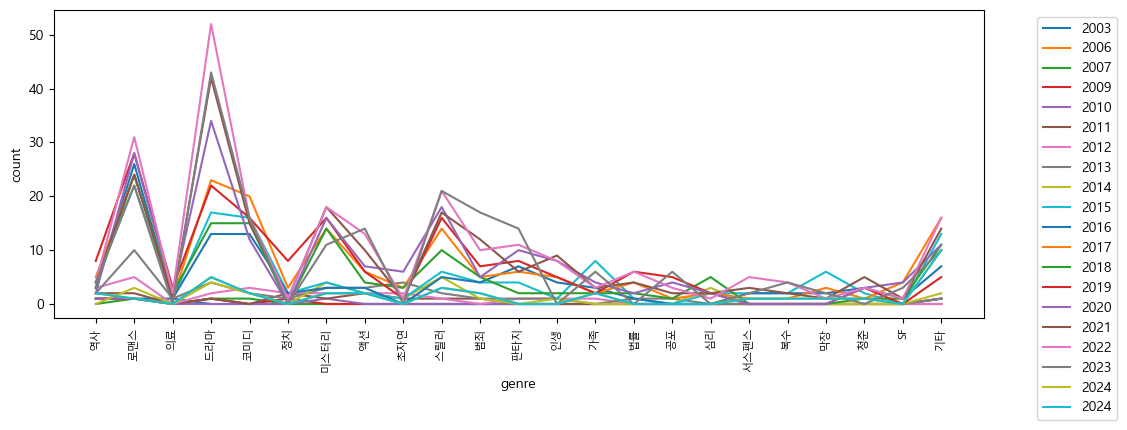

In [88]:
plt.figure(figsize=(12,4))
for i in range(len(y_count)):
    plt.plot(count.keys(),y_count[i],label=data['Year of release'].unique()[i])
plt.plot(count.keys(),y_count[-1],label=data['Year of release'].unique()[-1])
plt.xticks(rotation=90,size=8)
plt.ylabel('count')
plt.xlabel('genre')
plt.legend(fontsize = '9')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./static/yg_count.jpg')
plt.show()


In [82]:
sd=[]
for i in range(len(data['Year of release'].unique())):
    sd.append([y_count[i][3]])
sd

[[0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [2],
 [4],
 [4],
 [17],
 [13],
 [23],
 [15],
 [22],
 [34],
 [42],
 [52],
 [43],
 [5]]

In [83]:
len(data['Year of release'].unique())

19

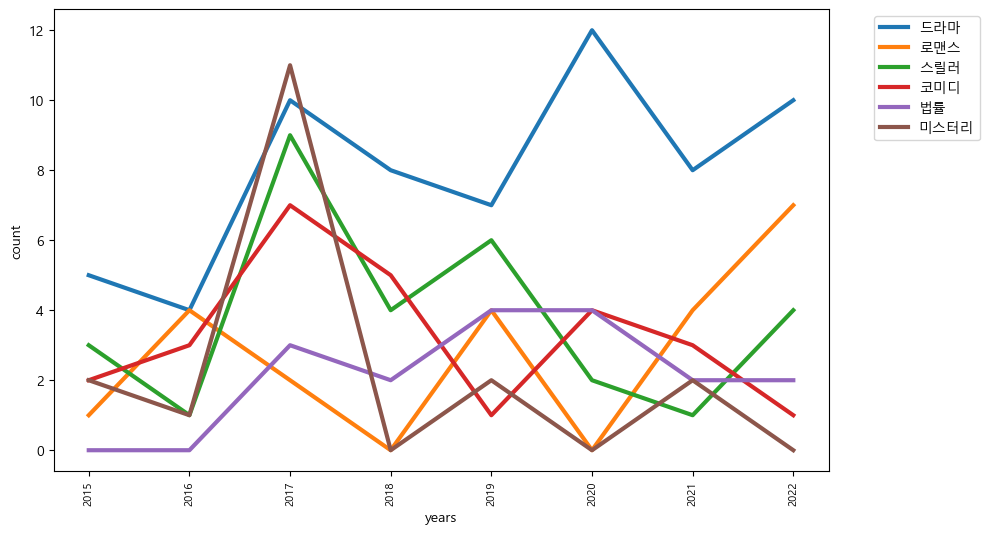

In [89]:

plt.figure(figsize=(10,6))
for j in [3,1,9,4,14,6]:#range(len(count.keys())):
    sd=[]
    sd.append(abs(y_count[i][j]))
    for i in range(10,len(data['Year of release'].unique()),1):
        sd.append(abs(y_count[i][j]-y_count[i-1][j]))
    plt.plot(data['Year of release'].unique()[9:-2],sd[:-2],label=list(count.keys())[j],linewidth='3')
plt.xticks(rotation=90,size=8)
plt.ylabel('count')
plt.xlabel('years')
plt.legend(fontsize = '9',)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('./static/yg_count1.jpg')
plt.show()


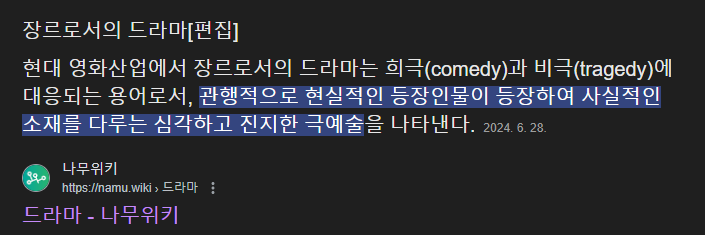

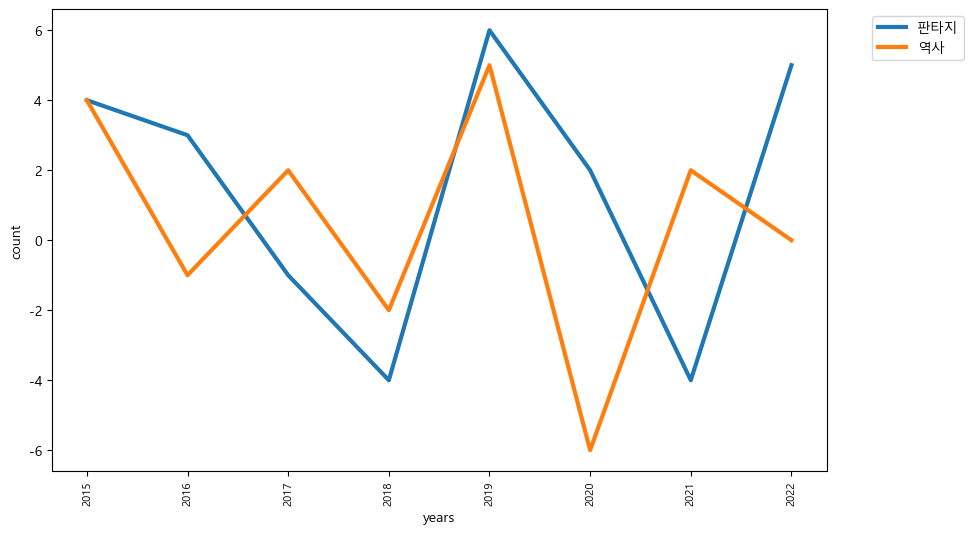

In [86]:

plt.figure(figsize=(10,6))
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
for j in [11,0]:#range(len(count.keys())):
    sd=[y_count[8][j]]
    for i in range(9,len(data['Year of release'].unique()),1):
        sd.append(y_count[i][j]-y_count[i-1][j])
    plt.plot(data['Year of release'].unique()[9:-2],sd[1:-2],label=list(count.keys())[j],linewidth='3')
plt.xticks(rotation=90,size=8)
plt.ylabel('count')
plt.xlabel('years')
plt.legend(fontsize = '9',)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('./static/yg_count1.jpg')
plt.show()


In [ ]:
years = data['Year of release'].unique()
print(np.where(years == 2021))

(array([15], dtype=int64),)
